<a href="https://www.kaggle.com/code/khoatran311/bicycle-theft-and-shoplifting-two-growing-crimes?scriptVersionId=190224837" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="font-size: 40px;">Introduction</h1>

<h2 style="font-size: 20px;
           line-height: 1.5;
           margin-bottom: 20px"
    > Crime activities in Cambridge from 2009 to 2023 are analyzed in aspects of their overall trend, relative change, density make-up each year, and activity hours which the crime usually occurs. Of all crimes, Larceny of Bicycle and Shoplifting appears to be growing more and more prevalent. Despite Hit and Run being the more popular crime in terms of reporting, both Larceny of Bicycle and Shoplifting are increasing more drastically than when they started in 2009, and increasing much faster as compared to Hit and Run. Most crimes occur around the mark of 3:00PM in the evening, for both nieghborhoods highly affected by crimes and other neighborhoods in general.
</h2>

In [1]:
library(tidyverse)
library(data.table)
library(patchwork)

theme_custom <- theme_classic() +
                theme(## Axis labels
                      axis.text.x = element_text(size=18, family="Econ Sans Cnd light"),
                      axis.text.y = element_text(size=18, family="Econ Sans Cnd light"),
                      ## Title, subtitle, caption, legend
                      plot.title = element_text(size=22, face="bold", family="Econ Sans Cnd bold", 
                                                hjust = 0, vjust = 1, margin = margin(b = 10)),
                      plot.subtitle = element_text(size=18, family="Econ Sans Cnd regular",
                                                   hjust = 0),
                      plot.caption = element_text(size=12, face="bold", family="Econ Sans Cnd light", hjust=0, colour="#6F8793"),
                      legend.position = "top",
                      legend.text = element_text(size=15, hjust=0, vjust=.1),
                      legend.title = element_blank(),
                      ## y-axis lines
                      panel.grid.major.y = element_line(color="#6F8793"),
                      ## Background color
                      panel.background=element_rect(fill="#F3F0E0"),
                      plot.background=element_rect(fill="#F3F0E0"),
                      legend.background=element_rect(fill="#F3F0E0")
                     )

fig_size <- function(width=22, heigth=8){
    options(repr.plot.width=width, repr.plot.height=heigth)
}
fig_size()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘data.table’




The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




The following objects are masked from ‘package:dplyr’:

    between, first, last




The following object is masked from ‘package:purrr’:

    transpose




<h1 style="font-size: 40px;">Data Loading</h1>

<h2 style="font-size: 20px;
           line-height: 1.5;
           margin-bottom: 20px"
    > The data is loaded, then inspected for missing or duplicated values. No data processing was performed here; for data processing, all was done in this <a href="https://www.kaggle.com/code/khoatran311/cambridge-crime-data-feature-engineering">notebook</a>. 
</h2>

In [2]:
data <- read_csv("/kaggle/input/cambridge-crime-data-feature-engineering/cambridge_crime_clean.csv")

head(data, 5)
glimpse(data, 2)
spec(data)

Rows: 95890 Columns: 18


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file_number, crime, neighborhood, location
dbl  (12): reporting_area, report_time, report_day, report_month, report_yea...
date  (2): report_date, crime_date



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


file_number,crime,reporting_area,neighborhood,location,report_date,report_time,report_day,report_month,report_year,crime_date,crime_time,crime_day,crime_month,crime_year,crime_encoded,neighborhood_encoded,location_encoded
<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009-01323,Threats,105,East Cambridge,"100 OTIS ST, Cambridge, MA",2009-02-21,9.53,21,2,2009,2009-02-21,9.20,21,2,2009,48,3,1401
2009-01324,Auto Theft,1109,North Cambridge,"400 RINDGE AVE, Cambridge, MA",2009-02-21,9.59,21,2,2009,2009-02-20,22.30,20,2,2009,5,8,1919
2009-01327,Hit and Run,1109,North Cambridge,"400 RINDGE AVE, Cambridge, MA",2009-02-21,12.32,21,2,2009,2009-02-19,21.00,19,2,2009,19,8,1919
2009-01331,Larceny (Misc),1303,Strawberry Hill,"0 NORUMBEGA ST, Cambridge, MA",2009-02-21,15.05,21,2,2009,2009-02-21,15.00,21,2,2009,24,11,762
2009-01346,OUI,105,East Cambridge,"FIFTH ST & GORE ST, Cambridge, MA",2009-02-22,5.02,22,2,2009,2009-02-22,5.02,22,2,2009,36,3,3232


Rows: 95,890
Columns: 18
$ file_number          <chr> …
$ crime                <chr> …
$ reporting_area       <dbl> …
$ neighborhood         <chr> …
$ location             <chr> …
$ report_date          <date> …
$ report_time          <dbl> …
$ report_day           <dbl> …
$ report_month         <dbl> …
$ report_year          <dbl> …
$ crime_date           <date> …
$ crime_time           <dbl> …
$ crime_day            <dbl> …
$ crime_month          <dbl> …
$ crime_year           <dbl> …
$ crime_encoded        <dbl> …
$ neighborhood_encoded <dbl> …
$ location_encoded     <dbl> …


cols(
  file_number = col_character(),
  crime = col_character(),
  reporting_area = col_double(),
  neighborhood = col_character(),
  location = col_character(),
  report_date = col_date(format = ""),
  report_time = col_double(),
  report_day = col_double(),
  report_month = col_double(),
  report_year = col_double(),
  crime_date = col_date(format = ""),
  crime_time = col_double(),
  crime_day = col_double(),
  crime_month = col_double(),
  crime_year = col_double(),
  crime_encoded = col_double(),
  neighborhood_encoded = col_double(),
  location_encoded = col_double()
)

In [3]:
data %>%
    is.na() %>%
    apply(2, sum) %>%
    data.frame() %>%
    rename("NA_count"=".") %>%
    arrange(desc(NA_count))

,NA_count
,<int>
file_number,0
crime,0
reporting_area,0
neighborhood,0
location,0
report_date,0
report_time,0
report_day,0
report_month,0


In [4]:
duplicate_count <-
    data %>%
    duplicated() %>%
    sum()

print(paste("Duplicate count: ", duplicate_count, sep=""), quote=FALSE)

[1] Duplicate count: 0


In [5]:
data <- as.data.table(data)

<h1 style="font-size: 40px;">Crime Analysis</h1>

<h2 style="font-size: 20px;
           line-height: 1.5;
           margin-bottom: 20px"
    > Various factors regarding to crime are analyzed: the prevalent crimes, the trends, the relative changes, the proportional make-up, and the activity hours. Of all crimes, it is determined that there must be a greater emphasis placed on crimes related to Larceny of Bicycle and Shoplifting. Both may not be as popular to Hit and Run in terms of how many reports there are, but both have increased with a much greater percentage than Hit and Run.
</h2>

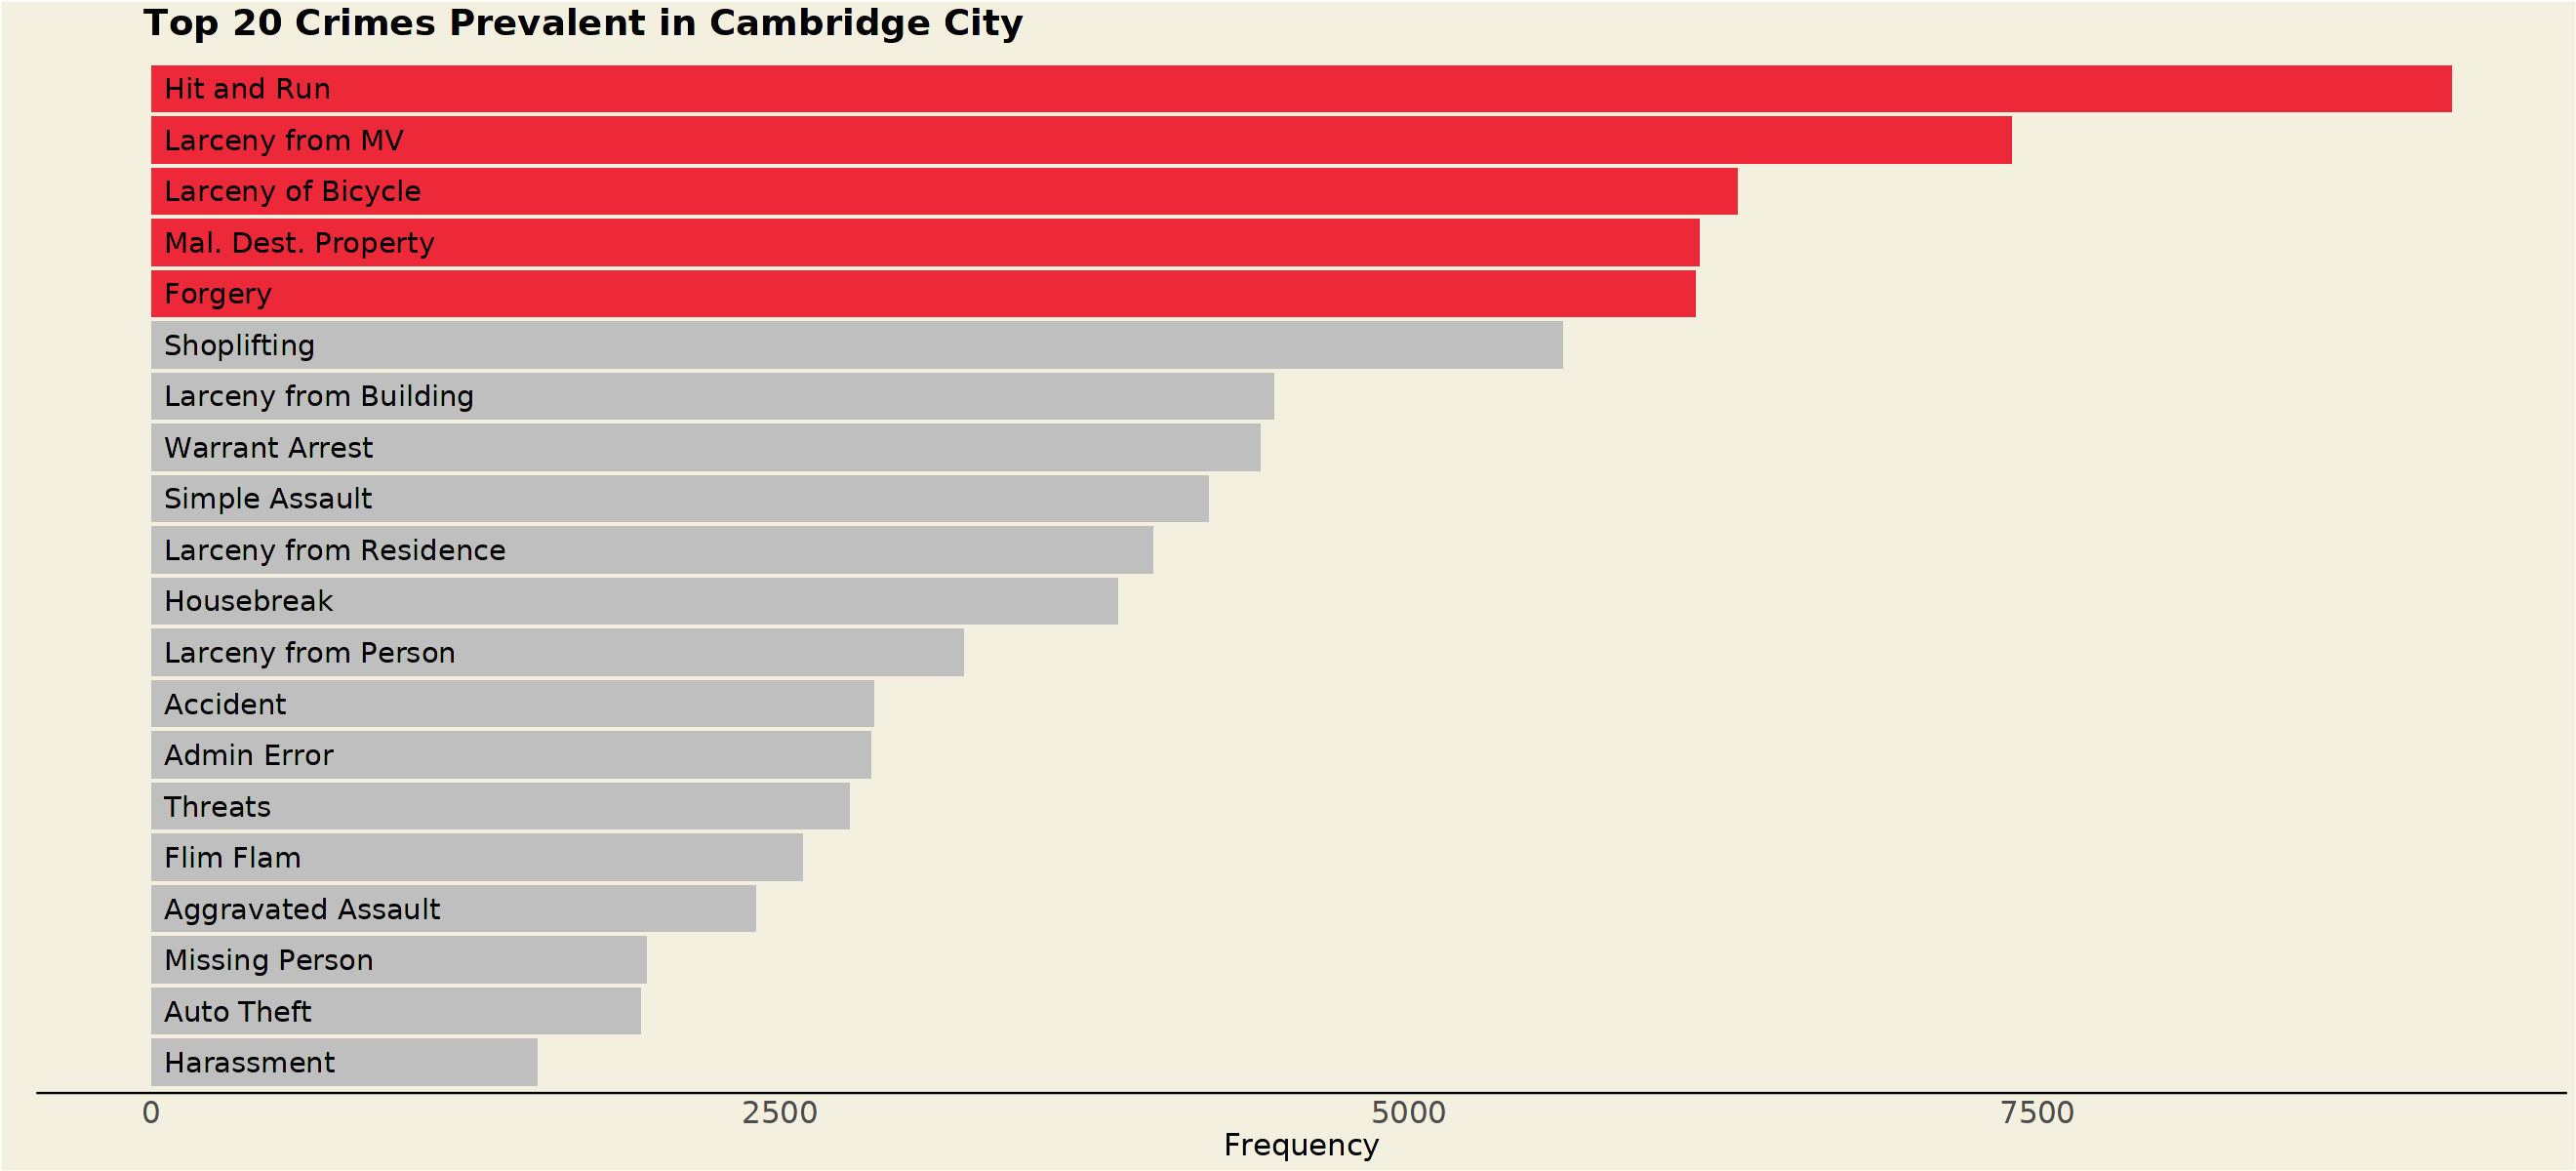

In [6]:
color_fill <- rep("No", 20)
color_fill[1:5] <- rep("Yes", 5)

fig_size(22, 10)
data %>%
    group_by(crime) %>%
    summarise("count"=n()) %>%
    arrange(desc(count)) %>%
    head(20) %>%
    mutate(crime=fct_reorder(crime,count),
           "color_code"=color_fill) %>%
    
    ## Plot
    ggplot(aes(x=count, y=crime, fill=color_code)) +
    geom_bar(stat="identity") +
    labs(title="Top 20 Crimes Prevalent in Cambridge City",
         y="",
         x="Frequency"
        ) +
    theme_custom +
    theme(axis.line.y = element_blank(),
          axis.ticks.y = element_blank(),
          panel.grid.major.y = element_blank(),
          axis.ticks.x = element_blank(),
          axis.text.y = element_blank(),
          legend.position="none",
          plot.title = element_text(size=22, face="bold", family="Econ Sans Cnd bold", 
                                    hjust = .065, vjust = 1, margin = margin(b = 10)),
          axis.title.x = element_text(size=18, family="Econ Sans Cnd light"),
         ) +
    geom_text(aes(x=0, y=crime, label=crime),
              hjust=0,
              nudge_x=50,
              color="black",
              family = "Econ Sans Cnd regular",
              size = 6
              ) +
    scale_fill_manual(values=c("Yes"="#ED2939", "No"="#BFBFBF"))

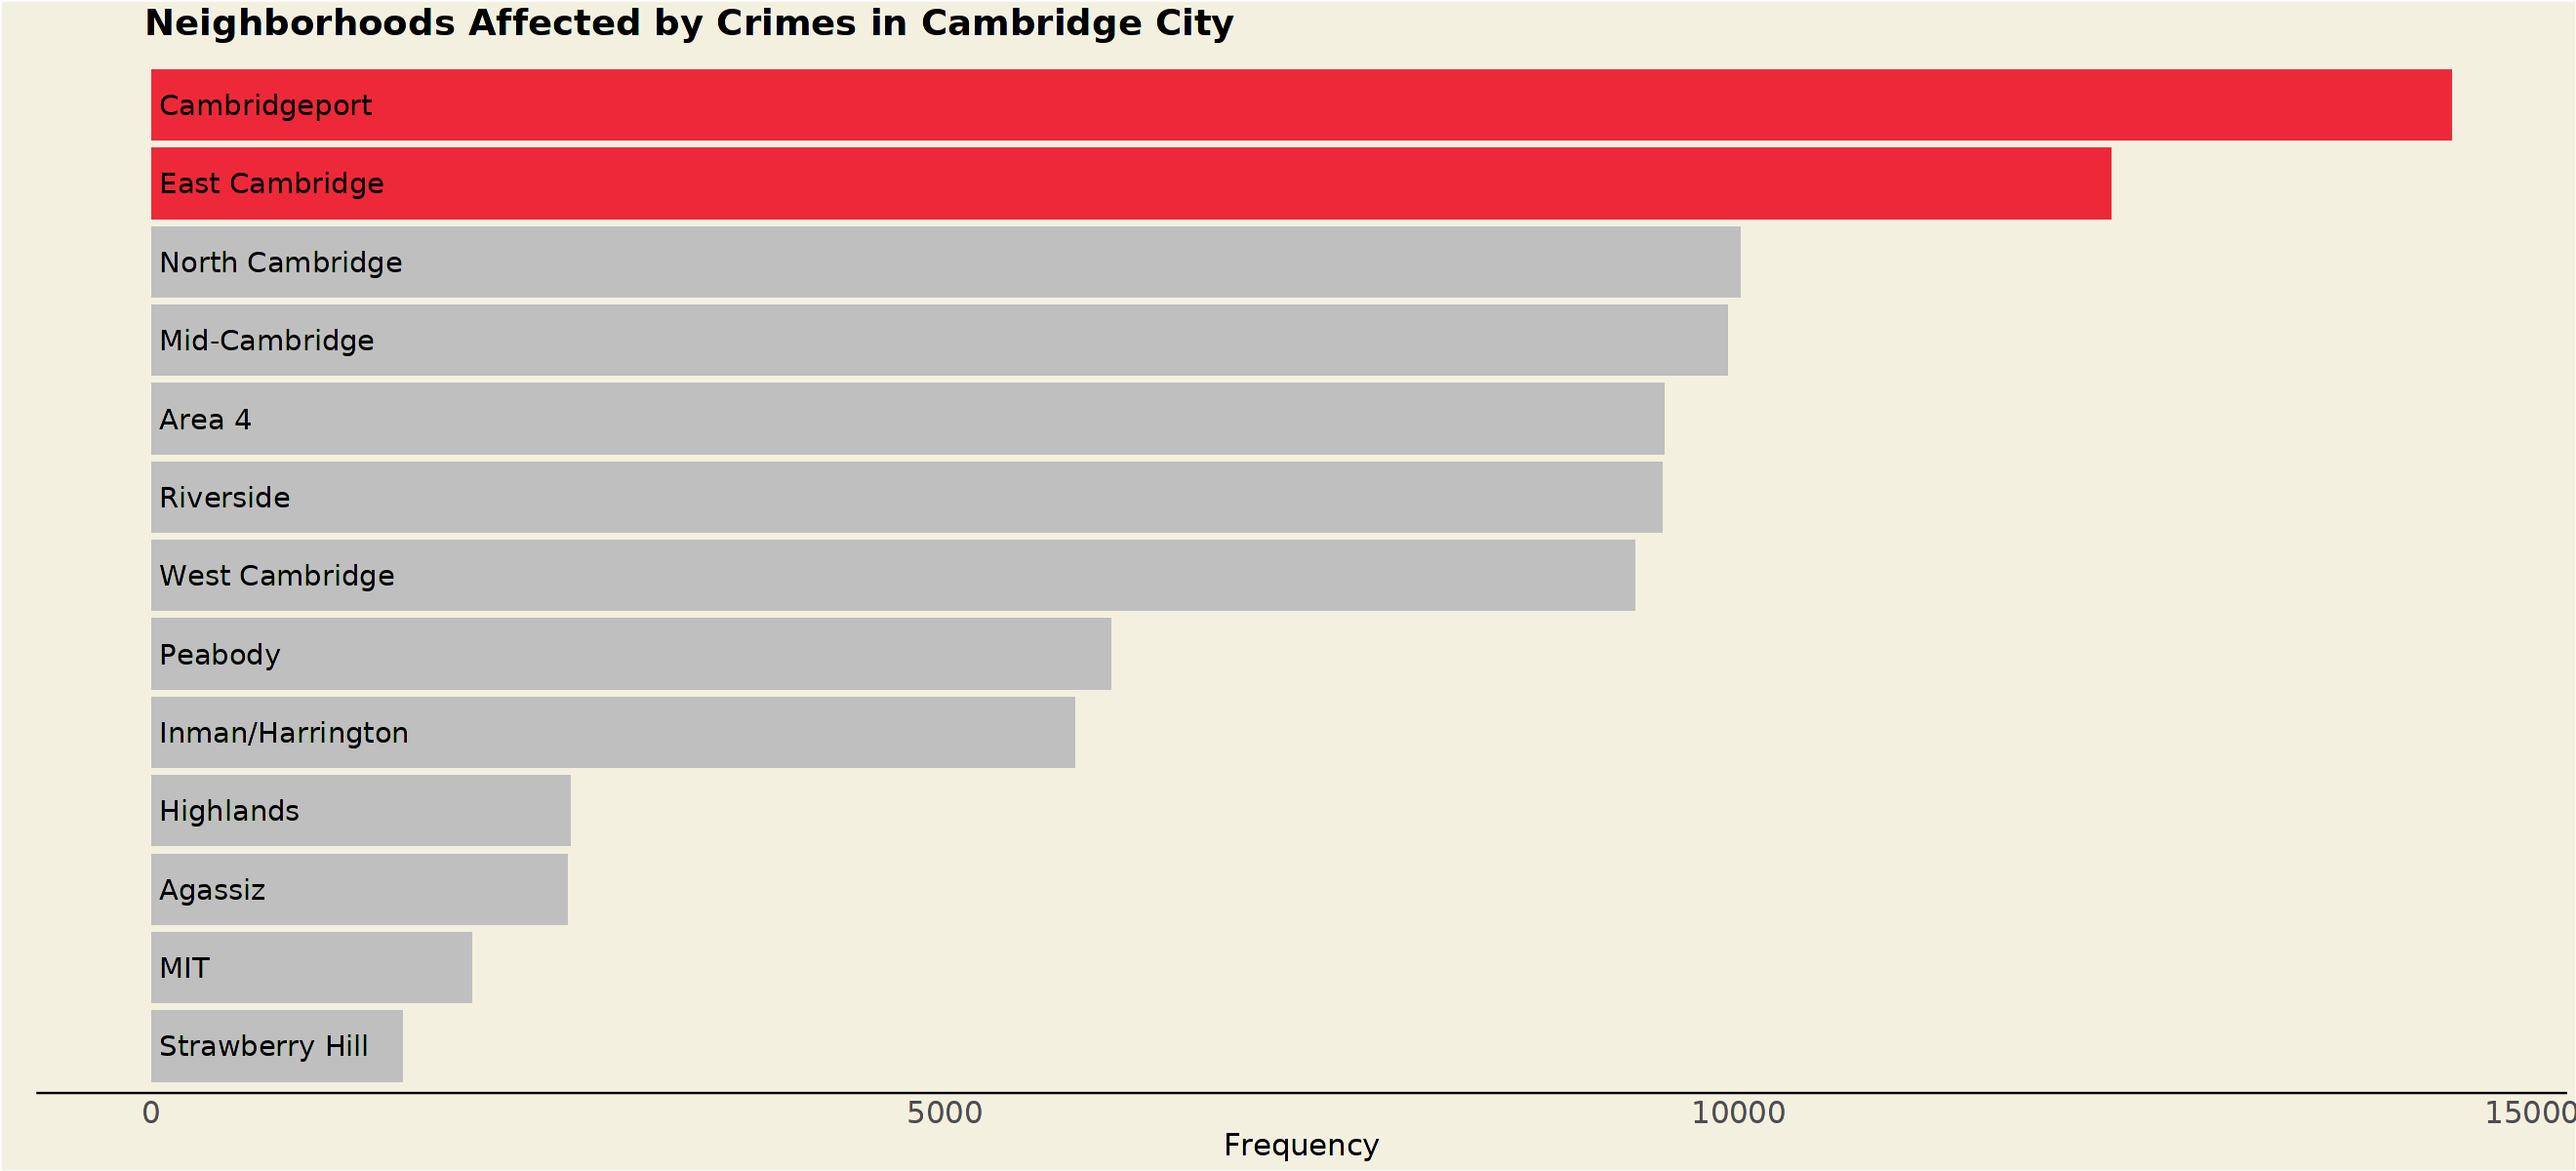

In [7]:
color_fill <- rep("No", 13)
color_fill[1:2] <- rep("Yes", 2)

data %>%
    group_by(neighborhood) %>%
    summarise("count"=n()) %>%
    arrange(desc(count)) %>%
    mutate(neighborhood=fct_reorder(neighborhood,count),
           "color_code"=color_fill) %>%
    ## Plot
    ggplot(aes(x=count, y=neighborhood, fill=color_code)) +
    geom_bar(stat="identity") +
    labs(title="Neighborhoods Affected by Crimes in Cambridge City",
         y="",
         x="Frequency"
         ) +
    theme_custom +
    theme(axis.line.y = element_blank(),
          axis.ticks.y = element_blank(),
          panel.grid.major.y = element_blank(),
          axis.ticks.x = element_blank(),
          axis.text.y = element_blank(),
          legend.position="none",
          plot.title = element_text(size=22, face="bold", family="Econ Sans Cnd bold", 
                                    hjust = .075, vjust = 1, margin = margin(b = 10)),
          axis.title.x = element_text(size=18, family="Econ Sans Cnd light")
         ) +
    geom_text(aes(x=0, y=neighborhood, label=neighborhood),
              hjust=0,
              nudge_x=50,
              color="black",
              family = "Econ Sans Cnd regular",
              size = 6
              ) +
    scale_fill_manual(values=c("Yes"="#ED2939", "No"="#BFBFBF"))

In [8]:
### Hit and Run is the dominant crime 
top_crime_df <-  ### Top crime, by neighborhood
    data %>%
    group_by(neighborhood, crime) %>%
    summarise("crime_count"=n(), .groups="drop") %>%
    arrange(neighborhood, desc(crime_count)) %>%
    group_by(neighborhood) %>%
    slice_max(order_by=crime_count, n=1, with_ties=FALSE) %>%
    rename("popular_crime"="crime")

top_crime_df

### Stacked bar chart
top_crime_df %>%
    group_by(popular_crime) %>%
    summarise("count"=n()) %>%
    mutate("prop"=count/sum(count))

neighborhood,popular_crime,crime_count
<chr>,<chr>,<int>
Agassiz,Hit and Run,340
Area 4,Hit and Run,841
Cambridgeport,Shoplifting,1192
East Cambridge,Shoplifting,1728
Highlands,Hit and Run,439
Inman/Harrington,Hit and Run,723
MIT,Hit and Run,266
Mid-Cambridge,Hit and Run,952
North Cambridge,Hit and Run,1125


popular_crime,count,prop
<chr>,<int>,<dbl>
Hit and Run,9,0.6923077
Larceny from MV,2,0.1538462
Shoplifting,2,0.1538462


In [9]:
### Popular crime from eacy year
data %>%
    group_by(crime_year, crime) %>%
    summarise("crime_count"=n(), .groups="drop") %>%
    arrange(crime_year, desc(crime_count)) %>%
    group_by(crime_year) %>%
    slice_max(order_by=crime_count, n=1, with_ties=FALSE) %>%
    ungroup() %>%
    select(crime_year, crime) %>%
    rename("popular_crime"="crime")

crime_year,popular_crime
<dbl>,<chr>
1924,Admin Error
1980,Forgery
1990,Forgery
1993,Forgery
1995,Flim Flam
1999,Stalking
2000,Forgery
2001,Aggravated Assault
2002,Forgery


In [10]:
### Compare proportion of change relative to first occurence number of crime k
crimes <- c("Hit and Run", "Larceny from MV", "Larceny of Bicycle",
            "Forgery", "Shoplifting", "Mal. Dest. Property")

popular_crimes_change <- 
    data %>%
    filter(crime_year>=2009,      ## Few crime occurrences before 2009, making the ratio too large
          crime_year<2024) %>%    ## Incomplete data in 2024 => deceiving appearance of lesser relative change ratio
    group_by(crime_year, crime) %>%
    summarise("crime_count"=n(), .groups="drop") %>%
    arrange(crime, crime_year) %>%
    group_by(crime) %>%
    mutate("change"=crime_count - lag(crime_count)) %>%
    group_by(crime) %>%
    summarise("relative_change"=sum(change, na.rm=TRUE)/first(crime_count)) %>% 
    arrange(desc(relative_change)) %>%
    filter(crime %in% crimes)

popular_crimes_change

crime,relative_change
<chr>,<dbl>
Larceny of Bicycle,0.9895833
Shoplifting,0.5694823
Forgery,0.5015106
Hit and Run,0.1921098
Mal. Dest. Property,-0.3188679
Larceny from MV,-0.6560789


`geom_smooth()` using formula = 'y ~ x'


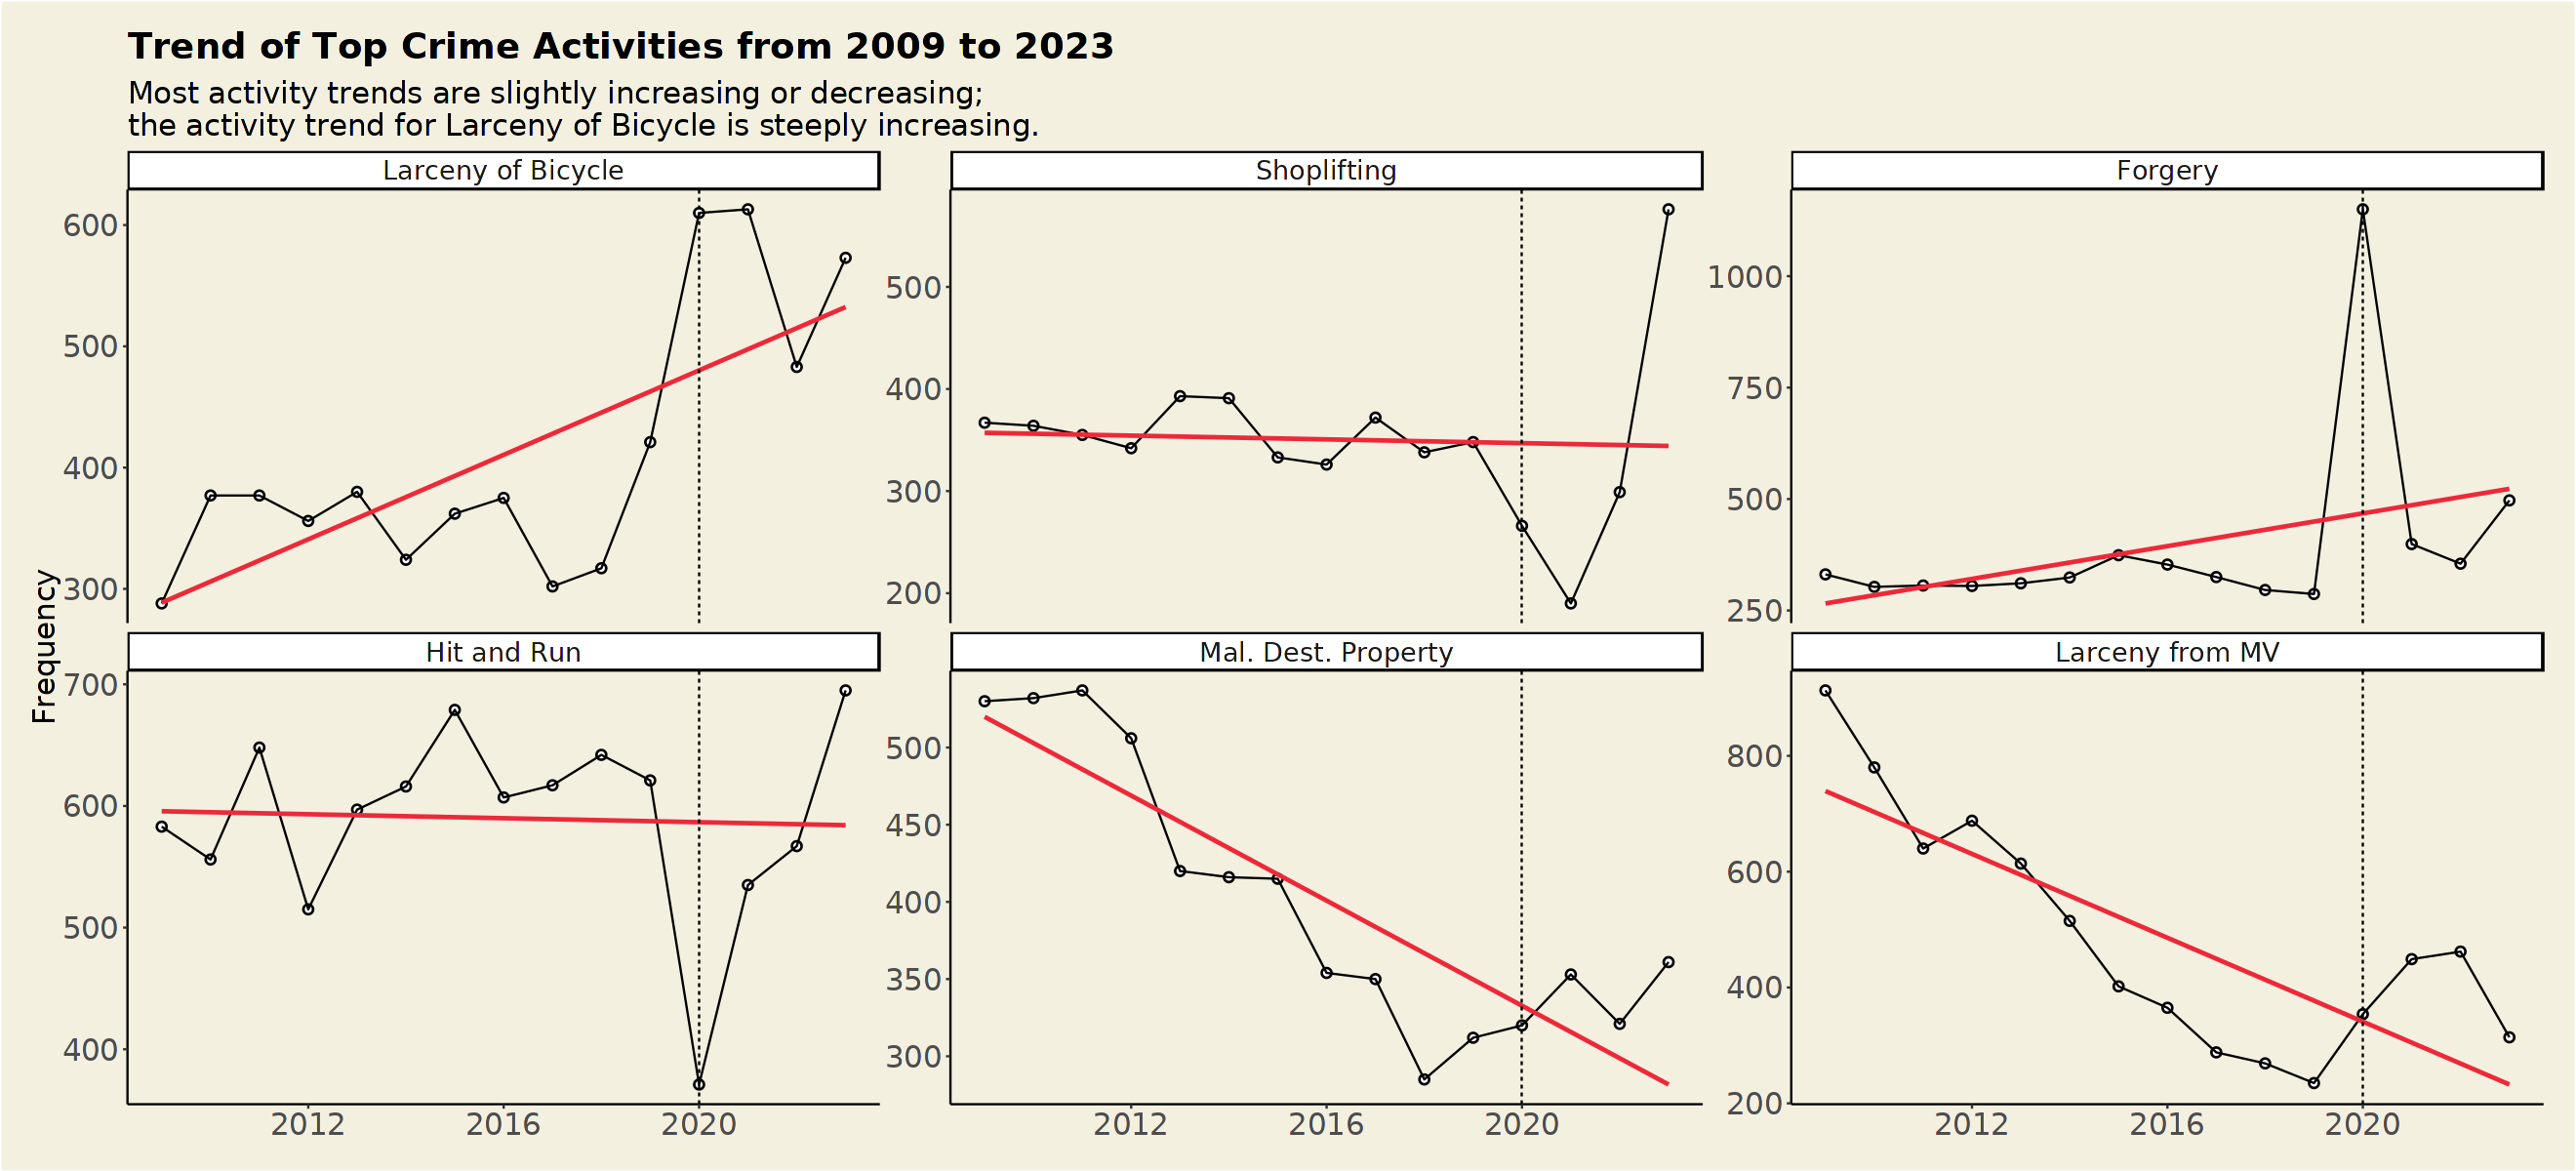

In [11]:
crime_levels <- popular_crimes_change$crime
subtitle <- "Most activity trends are slightly increasing or decreasing; 
the activity trend for Larceny of Bicycle is steeply increasing."

data %>%
    filter(crime_year>=2009,      ## Few crime occurrences before 2009, making the ratio too large
          crime_year<2024) %>%    ## Incomplete data in 2024 => deceiving appearance of lesser relative change ratio
    group_by(crime_year, crime) %>%
    summarise("crime_count"=n(), .groups="drop") %>%
    arrange(crime, crime_year) %>%
    filter(crime %in% crimes) %>%
    mutate(crime=factor(crime, levels=crime_levels)) %>%
    ## Plot
    ggplot(aes(x=crime_year, y=crime_count)) +
    geom_point(size=2.5) +
    geom_point(size=1, color="white") +
    geom_line() +
    labs(title="Trend of Top Crime Activities from 2009 to 2023",
         subtitle=subtitle,
         x="",
         y="Frequency"
        ) +
    geom_smooth(method="lm", se=FALSE, colour="#ED2939") +
    geom_vline(xintercept=2020, linetype="dashed") +
    facet_wrap(~crime, scales="free_y") +
    theme_custom +
    theme(panel.grid.major.y = element_blank(),
          plot.margin = margin(t = 20, r = 20, b = 5, l = 20),
          strip.text = element_text(size=16, family="Econ Sans Cnd light"),
          axis.title.y=element_text(size=18, family="Econ Sans Cnd light")
         )

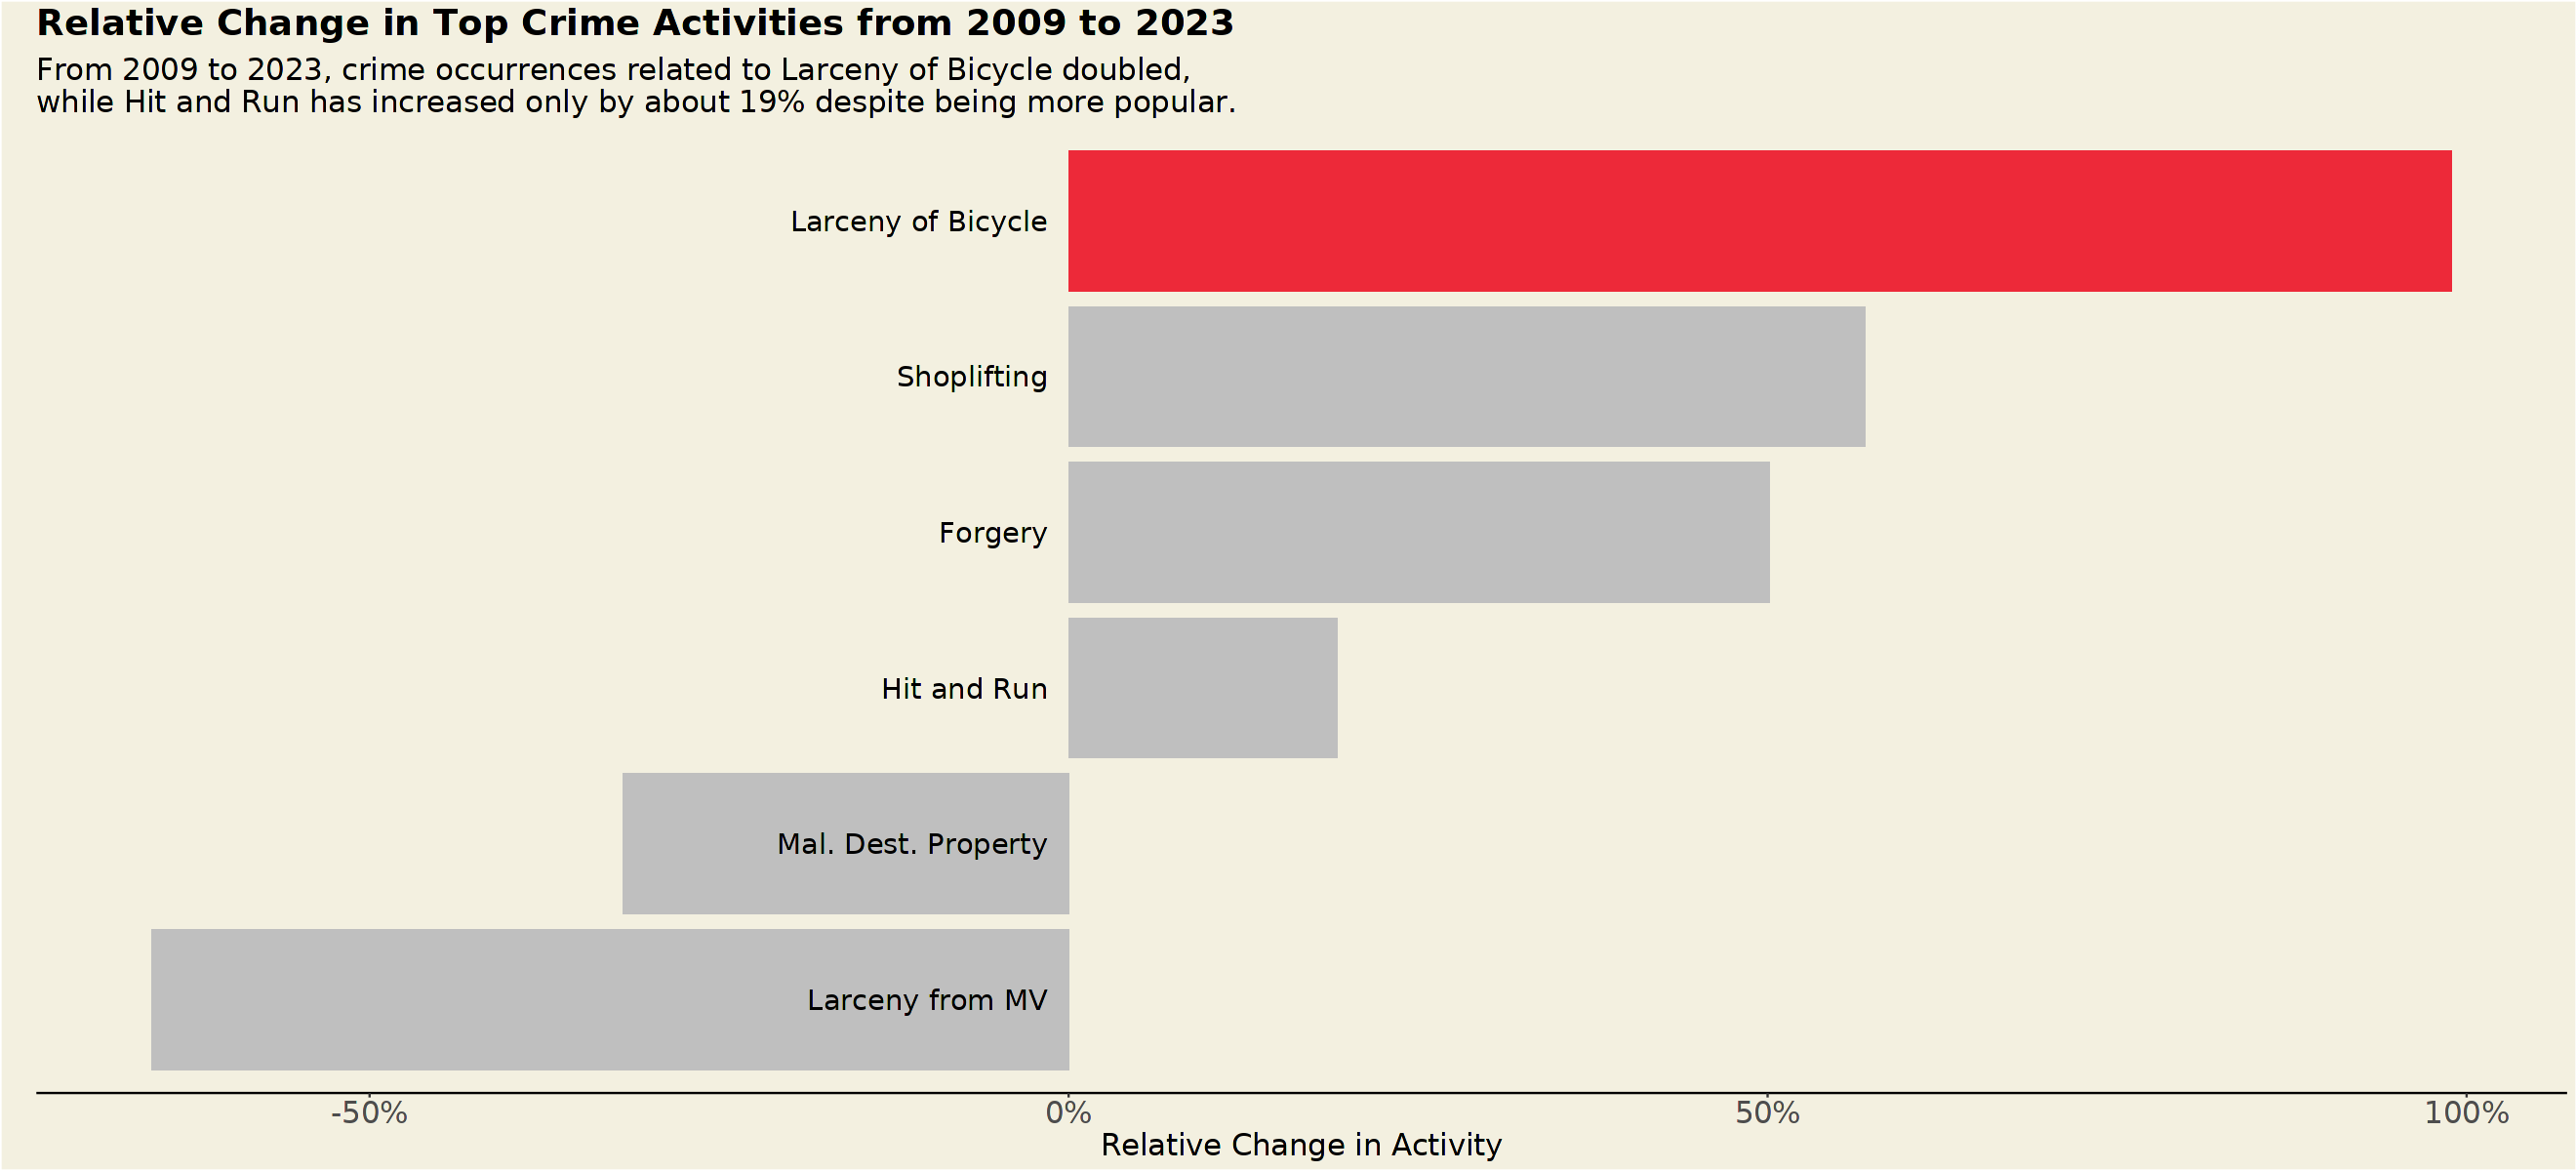

In [12]:
subtitle <- "From 2009 to 2023, crime occurrences related to Larceny of Bicycle doubled,
while Hit and Run has increased only by about 19% despite being more popular."
color_code <- rep("No", 6)
color_code[1] <- "Yes" 

popular_crimes_change %>%
    mutate(crime=fct_reorder(crime, relative_change),
           "color_code" = color_code) %>%
    ## Plot
    ggplot(aes(x=relative_change, y=crime, fill=color_code)) +
    geom_bar(stat="identity") +
    labs(title="Relative Change in Top Crime Activities from 2009 to 2023",
         subtitle=subtitle,
         x="Relative Change in Activity",
         y=""
        ) +
    theme_custom +
    theme(axis.line.y = element_blank(),
          panel.grid.major.y = element_blank(),
          axis.ticks.y = element_blank(),
          legend.position="none",
          axis.text.y=element_blank(),
          axis.title.x=element_text(size=18, family="Econ Sans Cnd light")
         ) +
    geom_text(aes(x=0, y=crime, label=crime),
              hjust=1,
              nudge_x=-.015,
              color="black",
              family = "Econ Sans Cnd regular",
              size = 6
              ) +
    scale_fill_manual(values=c("Yes"="#ED2939", "No"="#BFBFBF")) +
    scale_x_continuous(labels = scales::percent_format())

`summarise()` has grouped output by 'crime_year'. You can override using the
`.groups` argument.


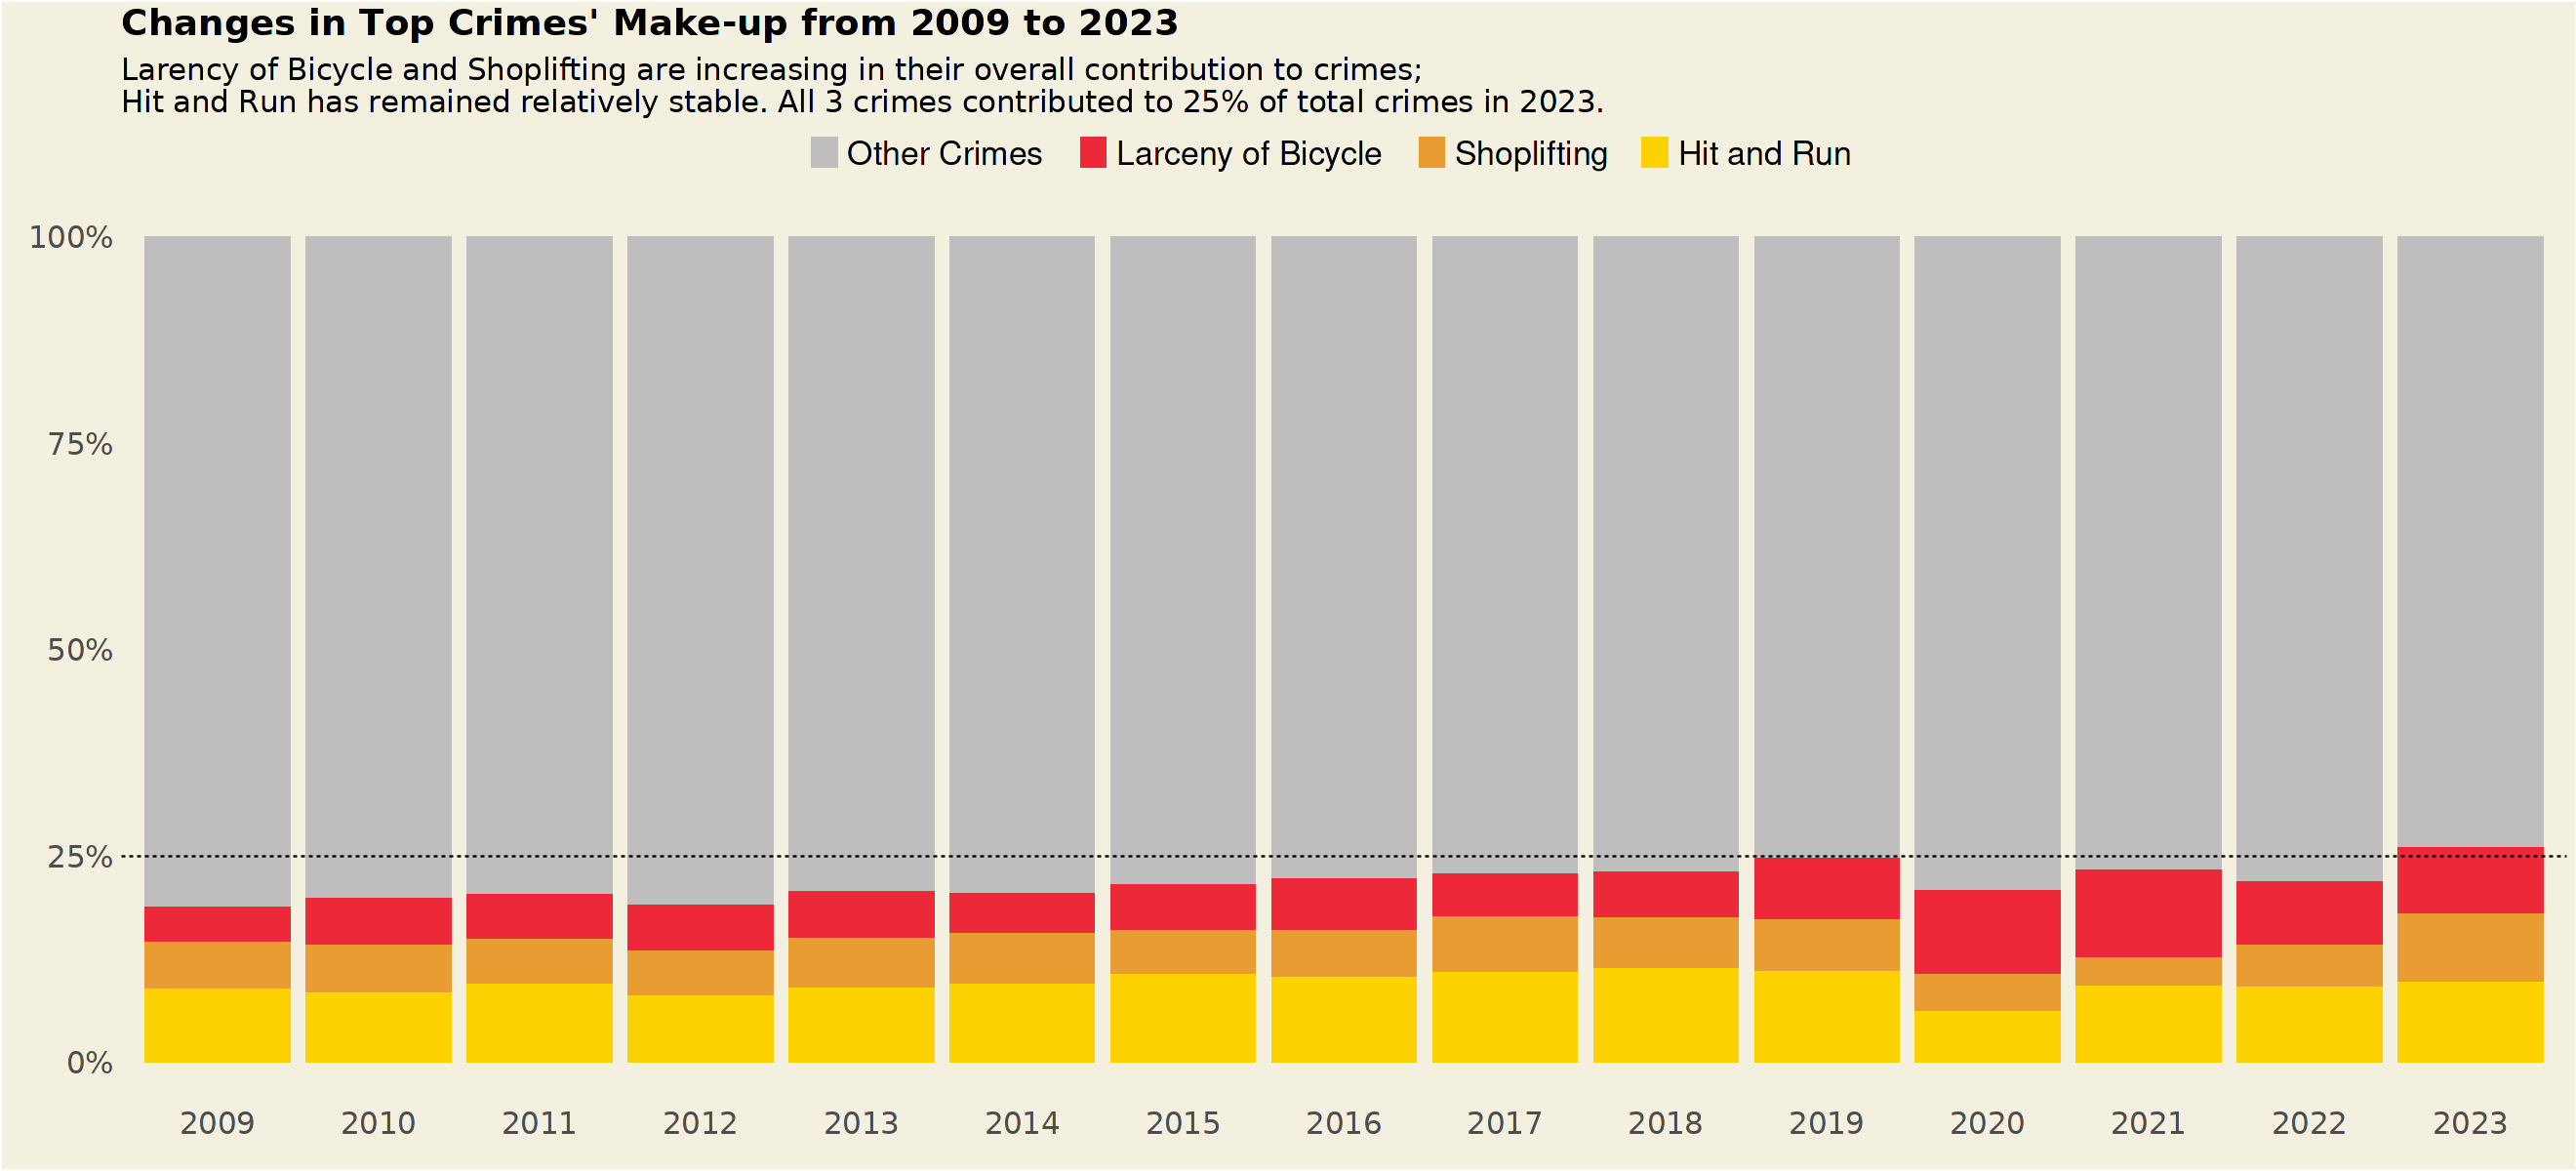

In [13]:
subtitle <- "Larency of Bicycle and Shoplifting are increasing in their overall contribution to crimes;
Hit and Run has remained relatively stable. All 3 crimes contributed to 25% of total crimes in 2023."

data %>%
    filter(crime_year>=2009,
           crime_year<2024,
          ) %>%
    mutate(crime = case_when(crime=="Larceny of Bicycle" ~ "Larceny of Bicycle   ",
                             crime=="Hit and Run" ~ "Hit and Run   ",
                             crime=="Shoplifting" ~ "Shoplifting   ",
                             .default="Other Crimes   "
                            )
           ) %>%
    group_by(crime_year, crime) %>%
    summarise("count"=n()) %>%
    mutate("proportion"=count/sum(count)) %>%
    mutate(crime_year=factor(crime_year)) %>%
    mutate(crime=factor(crime, levels=c("Other Crimes   ", "Larceny of Bicycle   ", "Shoplifting   ", "Hit and Run   "))) %>%

    ggplot(aes(x=crime_year, y=proportion, fill=crime)) +
    geom_bar(stat="identity") +
    geom_hline(yintercept=.25, linetype="dashed") +
    labs(title="Changes in Top Crimes' Make-up from 2009 to 2023",
         subtitle=subtitle,
         x="",
         y=""
        ) +
    theme_custom + 
    theme(axis.line.x = element_blank(),
          axis.ticks.x = element_blank(),
          axis.line.y = element_blank(),
          panel.grid.major.y = element_blank(),
          axis.ticks.y = element_blank(),
          legend.text = element_text(size=20, hjust=0, vjust=.5)
         ) +
    scale_y_continuous(labels = scales::percent_format()) +
    scale_fill_manual(values=c("Other Crimes   "="gray",
                               "Larceny of Bicycle   "="#ED2939",
                               "Shoplifting   "="#E89C31",
                               "Hit and Run   "="#FED100"
                               )
                     )

In [14]:
# crimes <- c("Larceny of Bicycle", "Hit and Run", "Shoplifting")

# data %>%
#     filter(crime_year>=2009,
#            crime_year<2024,
#            crime %in% crimes
#           ) %>%
#     group_by(crime_year, crime) %>%
#     summarise("count"=n()) %>%
#     mutate("proportion"=count/sum(count)) %>%
#     mutate(crime=factor(crime, levels=crimes),
#            crime_year=factor(crime_year)) %>%
#     ggplot(aes(x=crime_year, y=proportion, fill=crime)) +
#     geom_bar(stat="identity") +
#     labs(title="Changes in Proportions of Popular Crimes from 2009 to 2023",
#          x="",
#          y=""
#         ) +
#     theme_custom + 
#     theme(axis.line.x = element_blank(),
#           axis.ticks.x = element_blank(),
#           axis.line.y = element_blank(),
#           panel.grid.major.y = element_blank(),
#           axis.ticks.y = element_blank(),
#          ) +
#     scale_y_continuous(labels = scales::percent_format())

In [15]:
crime_levels <- c( "Hit and Run", "Shoplifting",
                  "Larceny of Bicycle", "Other Crimes")
crimes_hours_df <- 
    data %>%
    mutate(crime = case_when(crime=="Larceny of Bicycle" ~ "Larceny of Bicycle",
                             crime=="Hit and Run" ~ "Hit and Run",
                             crime=="Shoplifting" ~ "Shoplifting",
                             .default="Other Crimes"
                            )
           ) %>%
    mutate(crime = factor(crime, level=crime_levels)) %>%
    select(crime, crime_time)

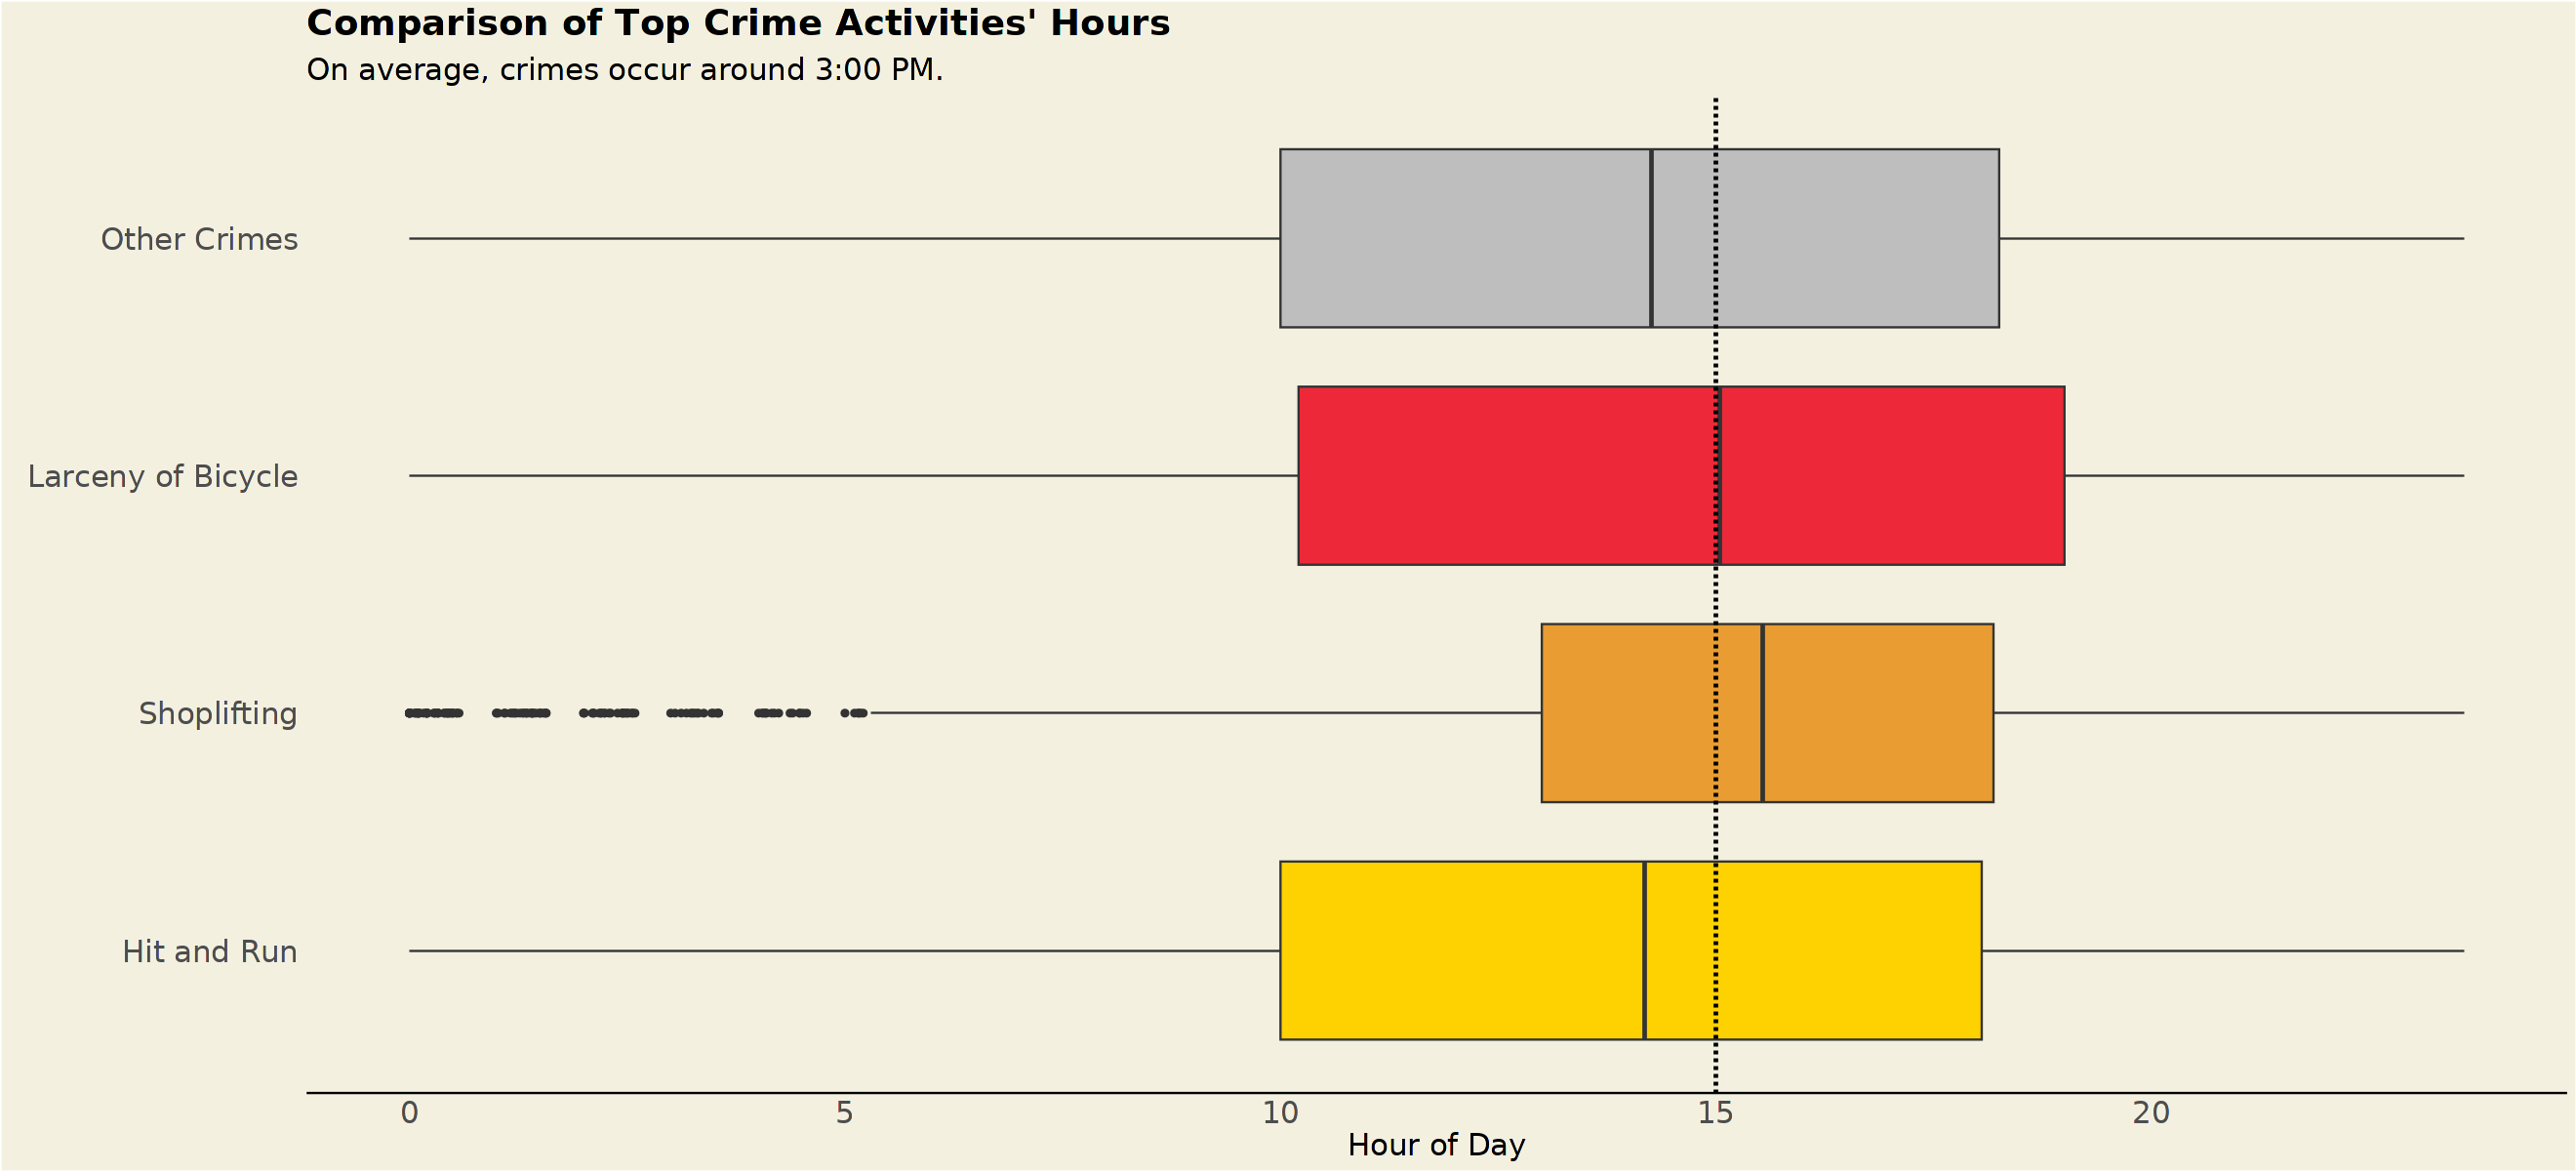

In [16]:
ggplot(data=crimes_hours_df, aes(x=crime_time, y=crime, fill=crime)) +
    geom_boxplot() +
    labs(title="Comparison of Top Crime Activities' Hours",
         subtitle="On average, crimes occur around 3:00 PM.",
         x="Hour of Day",
         y=""
        ) +
    geom_vline(xintercept=15, linetype="dashed", linewidth=1) +
    theme_custom +
    theme(axis.line.y = element_blank(),
          panel.grid.major.y = element_blank(),
          axis.ticks.y = element_blank(),
          axis.ticks.x = element_blank(),
          legend.position="none",
          axis.title.x=element_text(size=18, family="Econ Sans Cnd light")
         ) +
    scale_fill_manual(values=c("Other Crimes"="gray",
                               "Larceny of Bicycle"="#ED2939",
                               "Shoplifting"="#E89C31",
                               "Hit and Run"="#FED100"
                               )
                     )

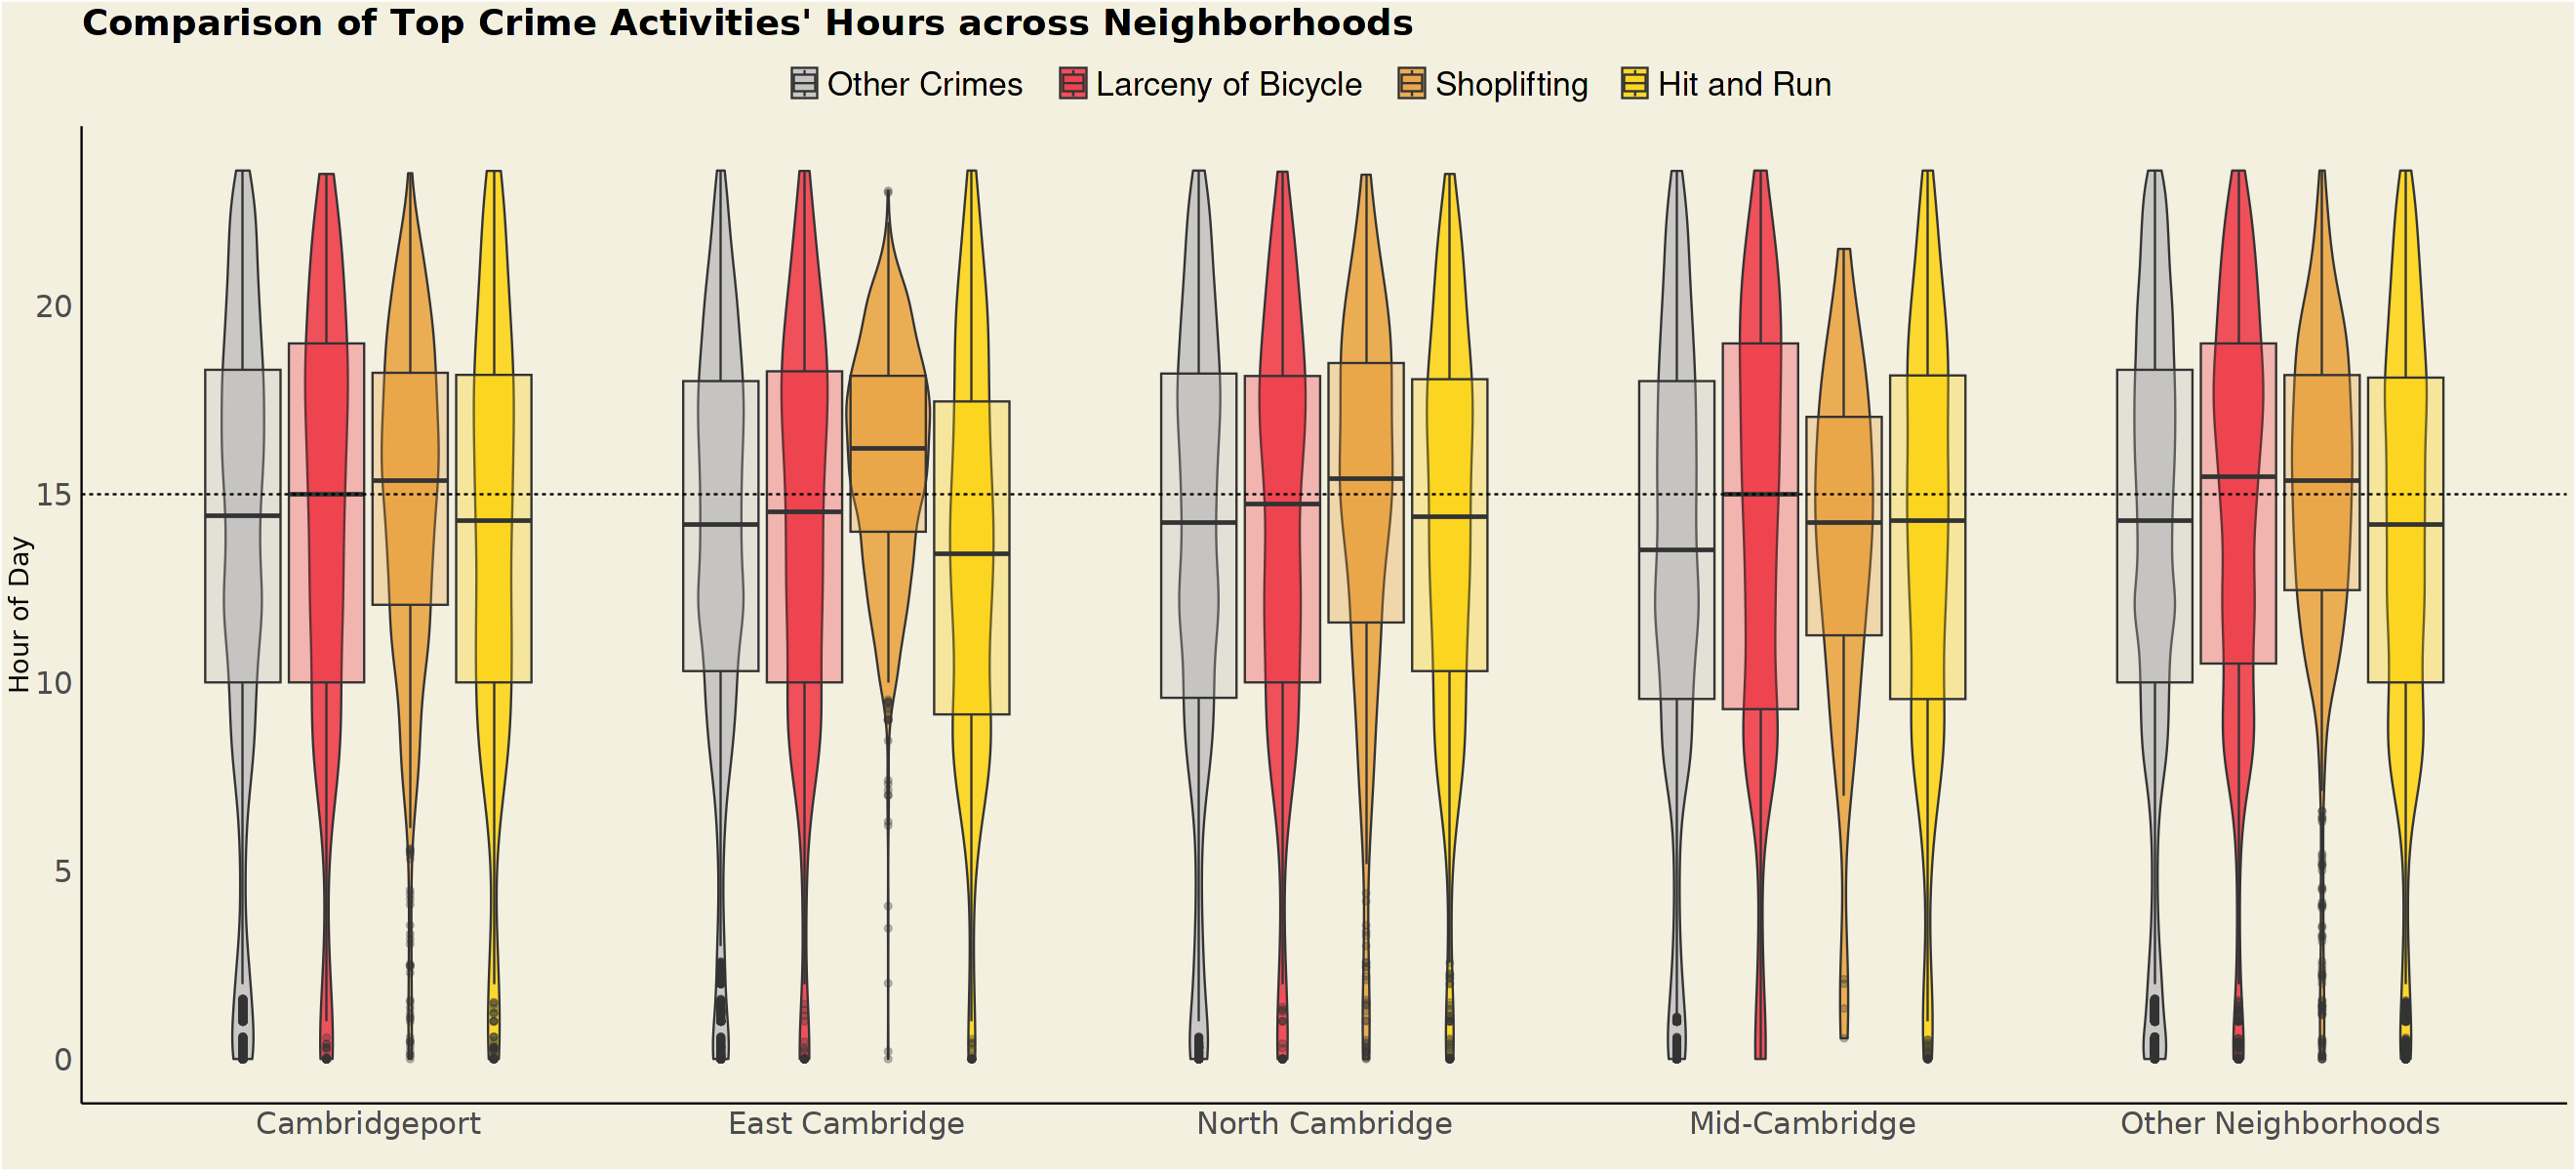

In [17]:
neighborhood_levels <- c("Cambridgeport", "East Cambridge",
                         "North Cambridge", "Mid-Cambridge", "Other Neighborhoods")
crime_levels <- c( "Hit and Run   ", "Shoplifting   ",
                  "Larceny of Bicycle   ", "Other Crimes   ")

data %>%
    mutate(neighborhood = case_when(neighborhood=="Cambridgeport" ~ "Cambridgeport",
                                    neighborhood=="East Cambridge" ~ "East Cambridge",
                                    neighborhood=="North Cambridge" ~ "North Cambridge",
                                    neighborhood=="Mid-Cambridge" ~ "Mid-Cambridge",
                                    .default="Other Neighborhoods"
                                   )
          ) %>%
    mutate(crime = case_when(crime=="Larceny of Bicycle" ~ "Larceny of Bicycle   ",
                             crime=="Hit and Run" ~ "Hit and Run   ",
                             crime=="Shoplifting" ~ "Shoplifting   ",
                             .default="Other Crimes   "
                            )
           ) %>%
    mutate(crime = factor(crime, level=rev(crime_levels)),
           neighborhood = factor(neighborhood, level=neighborhood_levels)
          ) %>%
    ggplot(aes(x=neighborhood, y=crime_time, fill=crime)) +
    geom_violin(alpha=.8, width=.7) +
    geom_boxplot(width=.7, alpha=.3, coef=1) +
    geom_hline(yintercept=15, linetype="dashed") +
    labs(title="Comparison of Top Crime Activities' Hours across Neighborhoods",
         x="",
         y="Hour of Day"
         ) +
    theme_custom +
    theme(axis.ticks.x=element_blank(),
          axis.ticks.y=element_blank(),
          panel.grid.major.y=element_blank(),
          axis.title.y=element_text(size=16, family="Econ Sans Cnd light"),
          legend.text = element_text(size=20, hjust=0, vjust=.5)
         ) +
    scale_fill_manual(values=c("Other Crimes   "="gray",
                               "Larceny of Bicycle   "="#ED2939",
                               "Shoplifting   "="#E89C31",
                               "Hit and Run   "="#FED100"
                               )
                     )